# Problem 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

## Checking shape, Data types, and statistical summary

In [2]:
election= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [3]:
election.head(10)

vote  age  economic.cond.national  economic.cond.household  Blair  \
1   Labour   43                       3                        3      4   
2   Labour   36                       4                        4      4   
3   Labour   35                       4                        4      5   
4   Labour   24                       4                        2      2   
5   Labour   41                       2                        2      1   
6   Labour   47                       3                        4      4   
7   Labour   57                       2                        2      4   
8   Labour   77                       3                        4      4   
9   Labour   39                       3                        3      4   
10  Labour   70                       3                        2      5   

    Hague  Europe  political.knowledge  gender  
1       1       2                    2  female  
2       4       5                    2    male  
3       2       3                    2    male  
4       1       4                    0  female  
5       1       6                    2    male  
6       4       4                    2    male  
7       4      11                    2    male  
8       1       1                    0    male  
9       4      11                    0  female  
10      1      11                    2    male

In [4]:
election.shape


(1525, 9)

In [5]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [6]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [7]:
election.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1525.0  54.182295  15.711209  24.0  41.0  53.0  67.0   
economic.cond.national   1525.0   3.245902   0.880969   1.0   3.0   3.0   4.0   
economic.cond.household  1525.0   3.140328   0.929951   1.0   3.0   3.0   4.0   
Blair                    1525.0   3.334426   1.174824   1.0   2.0   4.0   4.0   
Hague                    1525.0   2.746885   1.230703   1.0   2.0   2.0   4.0   
Europe                   1525.0   6.728525   3.297538   1.0   4.0   6.0  10.0   
political.knowledge      1525.0   1.542295   1.083315   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

In [8]:
#Encoding categorical variable
replace = {
    "gender" : {"male" : 1 , "female" : 0},
    "vote"  :  { "Conservative" : 1, "Labour" : 0}
}

In [9]:
election = election.replace(replace)

In [10]:
election["gender"].value_counts()

gender
0    812
1    713
Name: count, dtype: int64

In [11]:
election["vote"].value_counts()

vote
0    1063
1     462
Name: count, dtype: int64

In [12]:
election.duplicated().sum()

8

In [13]:
data = election[election.duplicated()]
data.head(10)

vote  age  economic.cond.national  economic.cond.household  Blair  \
68       0   35                       4                        4      5   
627      0   39                       3                        4      4   
871      0   38                       2                        4      2   
984      1   74                       4                        3      2   
1155     1   53                       3                        4      2   
1237     0   36                       3                        3      2   
1245     0   29                       4                        4      4   
1439     0   40                       4                        3      4   

      Hague  Europe  political.knowledge  gender  
68        2       3                    2       1  
627       2       5                    2       1  
871       2       4                    3       1  
984       4       8                    2       0  
1155      2       6                    0       0  
1237      2       6                    2       0  
1245      2       2                    2       0  
1439      2       2                    2       1

In [14]:
election.drop_duplicates(inplace=True)


In [15]:
election

vote  age  economic.cond.national  economic.cond.household  Blair  \
1        0   43                       3                        3      4   
2        0   36                       4                        4      4   
3        0   35                       4                        4      5   
4        0   24                       4                        2      2   
5        0   41                       2                        2      1   
...    ...  ...                     ...                      ...    ...   
1521     1   67                       5                        3      2   
1522     1   73                       2                        2      4   
1523     0   37                       3                        3      5   
1524     1   61                       3                        3      1   
1525     1   74                       2                        3      2   

      Hague  Europe  political.knowledge  gender  
1         1       2                    2       0  
2         4       5                    2       1  
3         2       3                    2       1  
4         1       4                    0       0  
5         1       6                    2       1  
...     ...     ...                  ...     ...  
1521      4      11                    3       1  
1522      4       8                    2       1  
1523      4       2                    2       1  
1524      4      11                    2       1  
1525      4      11                    0       0  

[1517 rows x 9 columns]

## Univariate and Bivariate Analysis

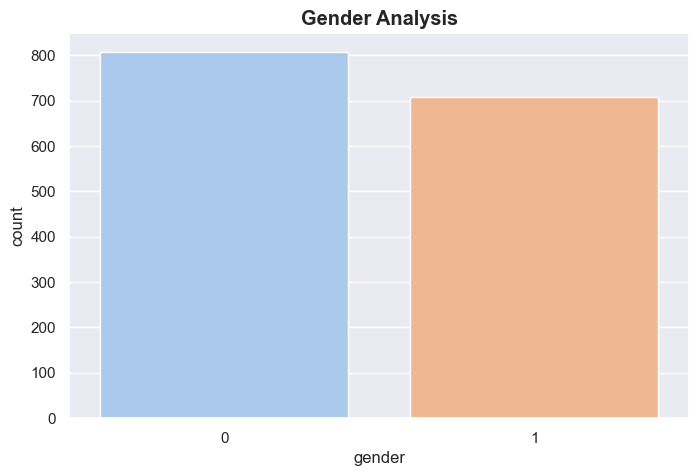

In [128]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender',data=election,palette='pastel');
plt.title('Gender Analysis',fontsize='large', loc='center',fontweight='bold');

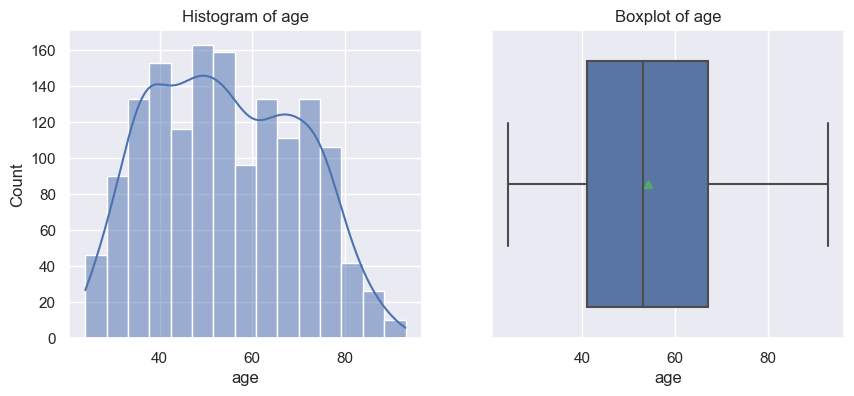

In [140]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Histogram of age')
sns.histplot(election['age'], kde=True, bins = 15);

plt.subplot(1,2,2)
plt.title('Boxplot of age')
sns.boxplot(x = 'age', data = election, showmeans=True);

<Figure size 6000x6000 with 0 Axes>

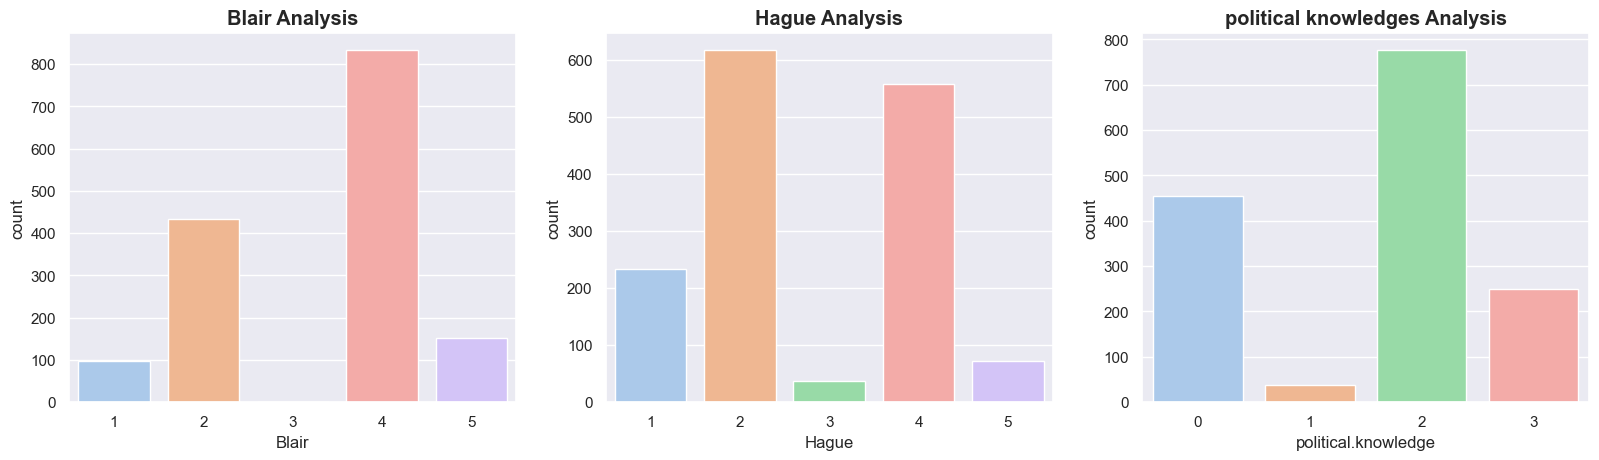

In [141]:
plt.figure(figsize=(60,60))
fig, ax =plt.subplots(1,3)

sns.countplot(x='Blair',data=election,palette='pastel',ax=ax[0]);
sns.countplot(x='Hague',data=election,palette='pastel',ax=ax[1]);
sns.countplot(x='political.knowledge',data=election,palette='pastel',ax=ax[2]);
ax[0].set_title('Blair Analysis',fontsize='large', loc='center',fontweight='bold');
ax[1].set_title('Hague Analysis',fontsize='large', loc='center',fontweight='bold');
ax[2].set_title('political knowledges Analysis',fontsize='large', loc='center',fontweight='bold');

plt.subplots_adjust(right = 2.5) 
plt.show()


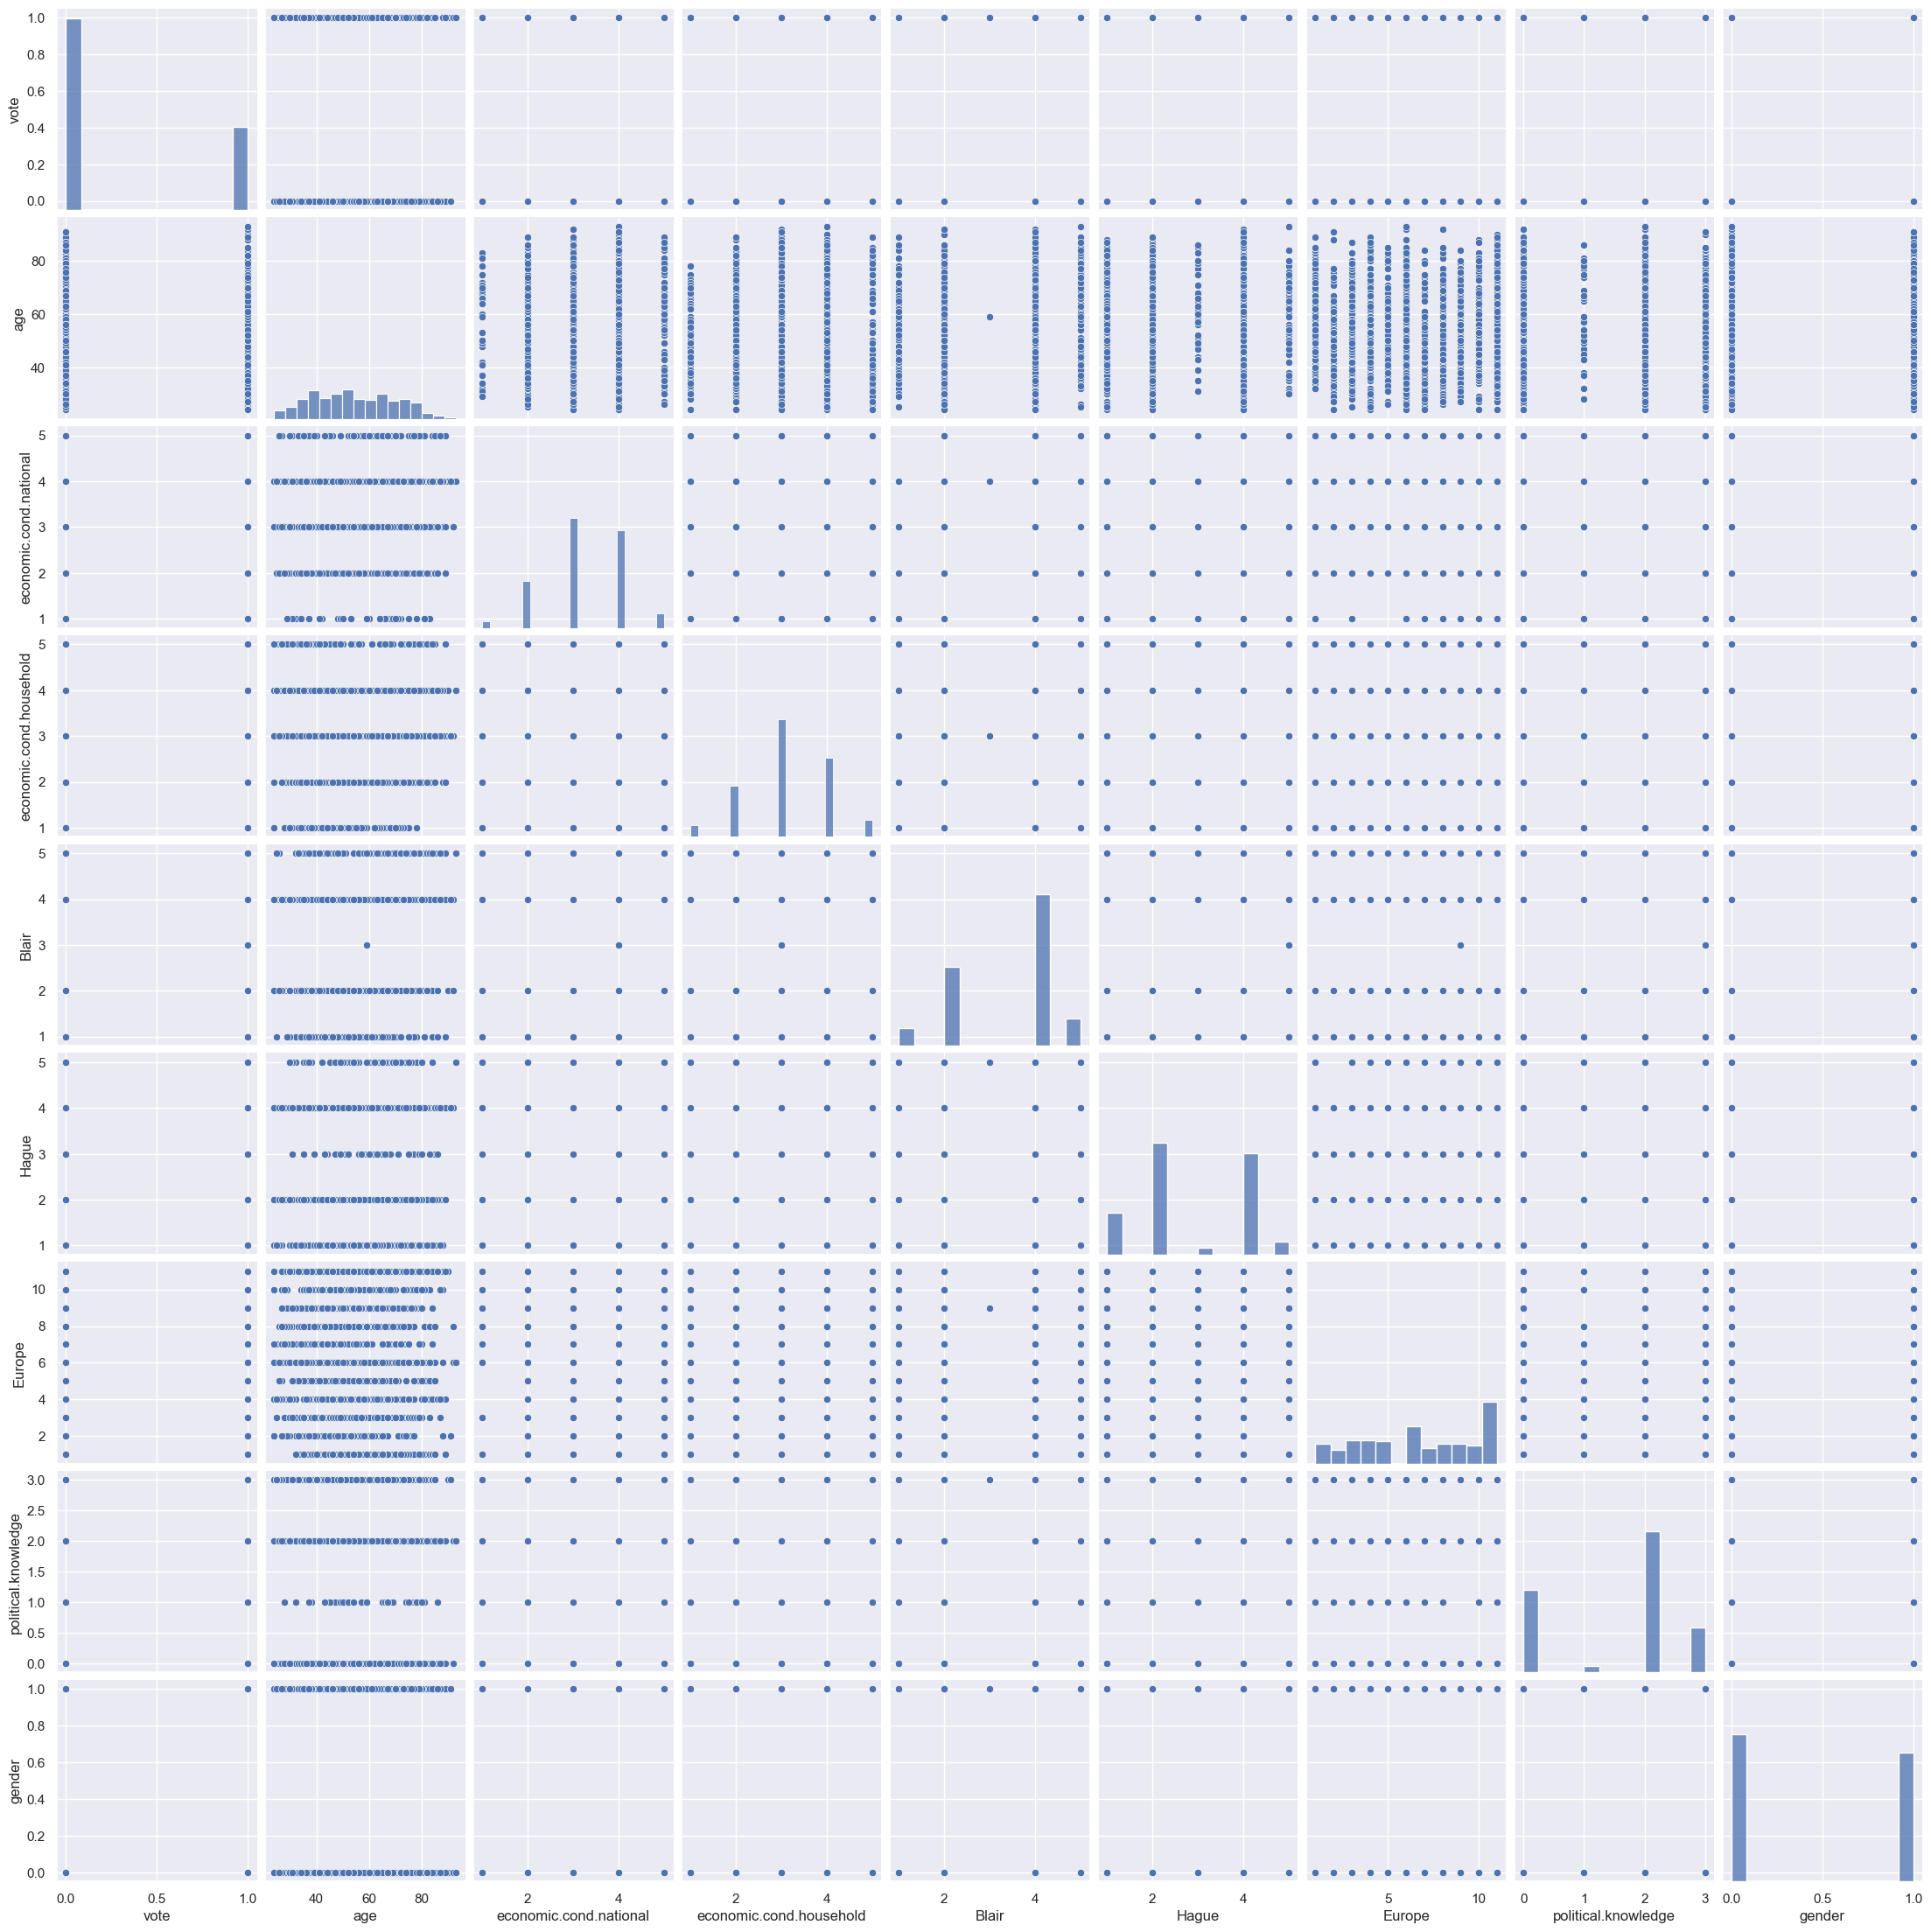

In [17]:
sns.pairplot(election)

<Axes: xlabel='Blair', ylabel='Count'>

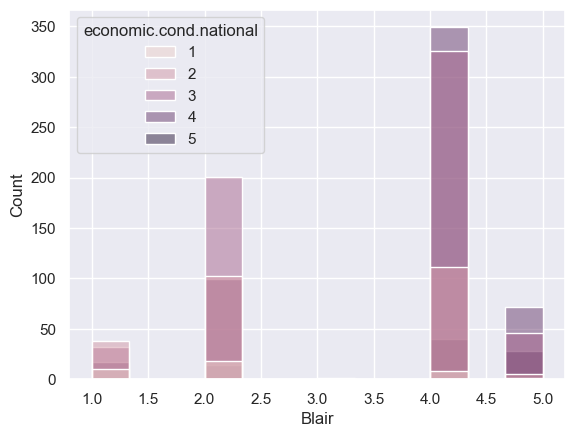

In [19]:
sns.histplot(data =election , x = "Blair", hue = "economic.cond.national")

<Axes: xlabel='Blair', ylabel='Count'>

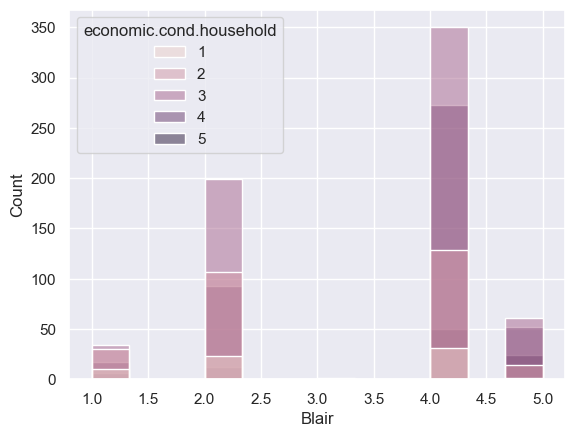

In [20]:
sns.histplot(data =election , x = "Blair", hue = "economic.cond.household")

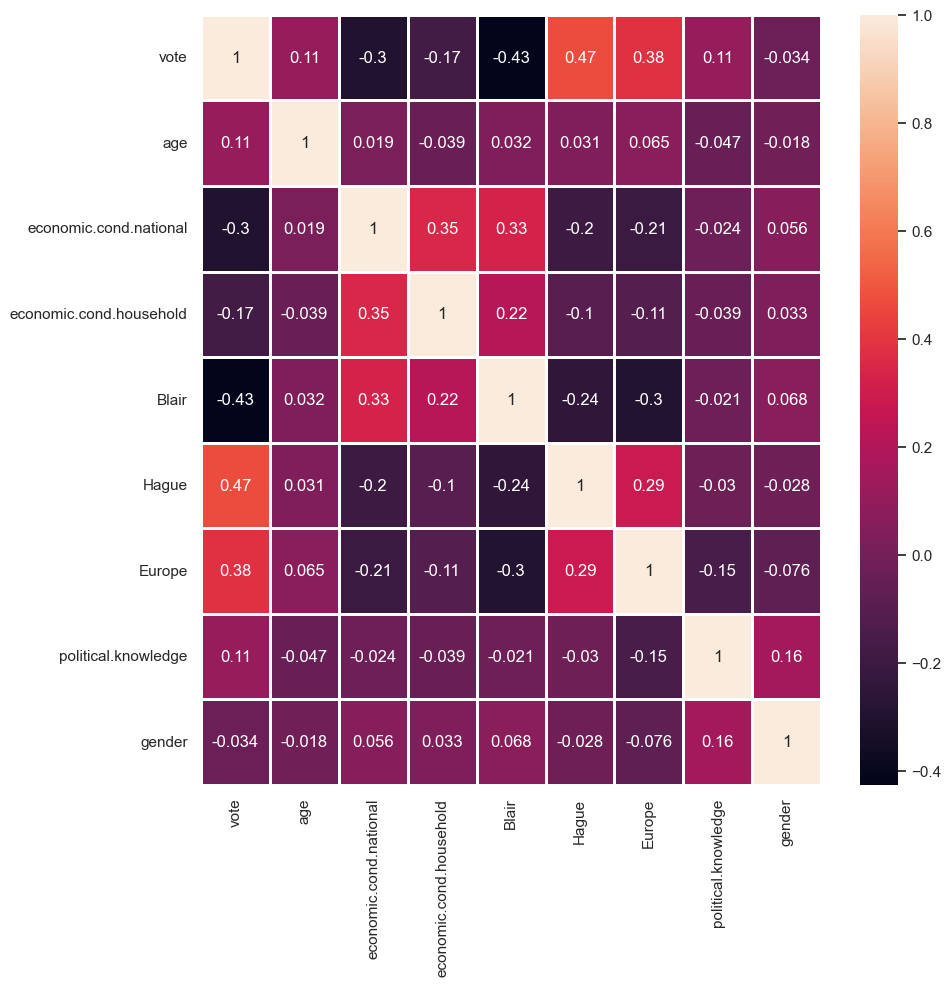

In [27]:
fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sns.heatmap(election.corr(), annot=True,linewidth = 1)

## Data Pre-processing

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
# transform data
scaled = scaler.fit_transform(election)
scaled

array([[0.        , 0.27536232, 0.5       , ..., 0.1       , 0.66666667,
        0.        ],
       [0.        , 0.17391304, 0.75      , ..., 0.4       , 0.66666667,
        1.        ],
       [0.        , 0.15942029, 0.75      , ..., 0.2       , 0.66666667,
        1.        ],
       ...,
       [0.        , 0.1884058 , 0.5       , ..., 0.1       , 0.66666667,
        1.        ],
       [1.        , 0.53623188, 0.5       , ..., 1.        , 0.66666667,
        1.        ],
       [1.        , 0.72463768, 0.25      , ..., 1.        , 0.        ,
        0.        ]])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x = election.drop("vote",axis = 1)
y = election.pop("vote")

In [34]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 1)

## Logistic Regression 

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression(tol=0.0001,max_iter=2000,random_state= 0)

In [37]:
lr.fit(x_train,y_train)


LogisticRegression(max_iter=2000, random_state=0)

In [38]:
y_train_predict=lr.predict(x_train)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Axes(0.125,0.11;0.62x0.77)


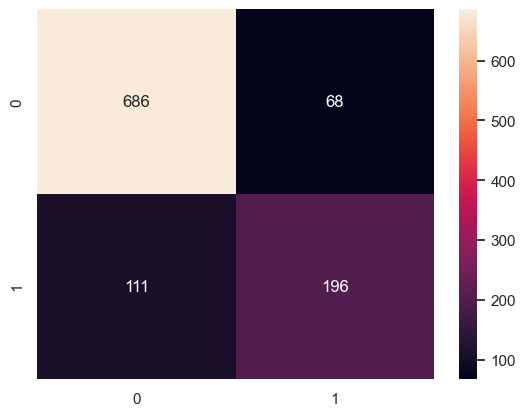

In [41]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))

In [42]:
print(confusion_matrix(y_test,lr.predict(x_test)))
print(classification_report(y_test,lr.predict(x_test)))

[[268  35]
 [ 40 113]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       303
           1       0.76      0.74      0.75       153

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



In [43]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train_predict, y_train))

0.16870876531573986


In [44]:
print(mean_squared_error(lr.predict(x_test), y_test))

0.16447368421052633


In [45]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC: 0.890


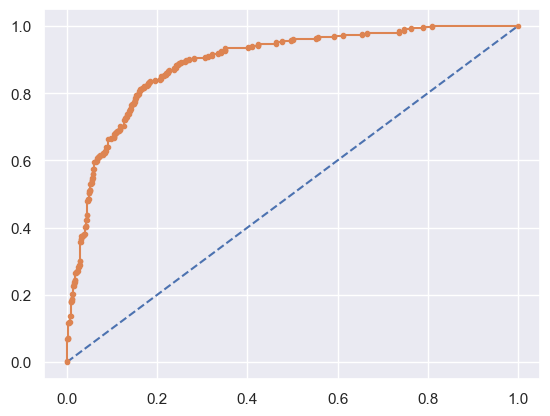

In [46]:
# AUC and ROC for the training data

# predict probabilities
probs = lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.883


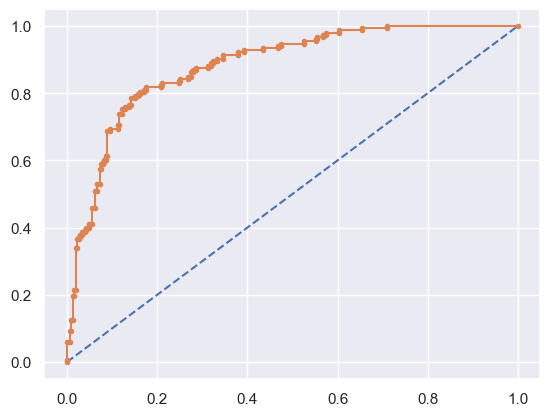

In [47]:
# AUC and ROC for the test data

# predict probabilities
probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Linear Discriminant Analysis

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [49]:
lda = LinearDiscriminantAnalysis()

In [50]:
lda = lda.fit(x_train,y_train)

In [51]:
print(confusion_matrix(lda.predict(x_train),y_train))
print(classification_report(lda.predict(x_train),y_train))

[[685 107]
 [ 69 200]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       792
           1       0.65      0.74      0.69       269

    accuracy                           0.83      1061
   macro avg       0.78      0.80      0.79      1061
weighted avg       0.84      0.83      0.84      1061



In [52]:
print(confusion_matrix(lda.predict(x_test),y_test))
print(classification_report(lda.predict(x_test),y_test))

[[269  42]
 [ 34 111]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       311
           1       0.73      0.77      0.74       145

    accuracy                           0.83       456
   macro avg       0.81      0.82      0.81       456
weighted avg       0.84      0.83      0.83       456



AUC: 0.889


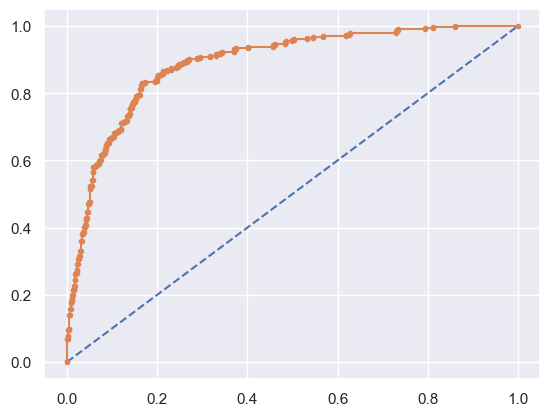

In [53]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.888


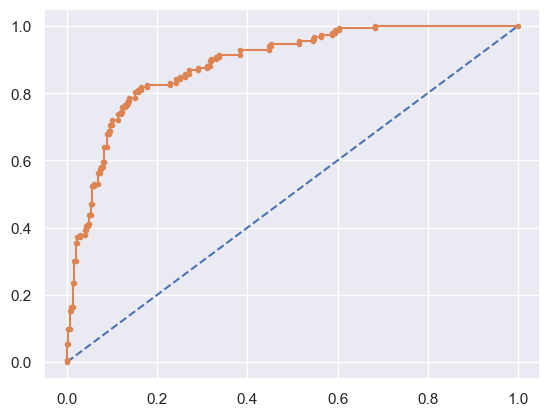

In [54]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## KNN Model

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [57]:
knn = knn.fit(x_train,y_train)

In [58]:
pred_label= knn.predict(x_test)
knn.score(x_test,y_test)

0.8245614035087719

In [59]:
print(confusion_matrix(knn.predict(x_train),y_train))


[[699  98]
 [ 55 209]]


In [60]:
print(classification_report(knn.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       327
           1       0.66      0.78      0.72       129

    accuracy                           0.82       456
   macro avg       0.78      0.81      0.79       456
weighted avg       0.84      0.82      0.83       456



AUC: 0.924


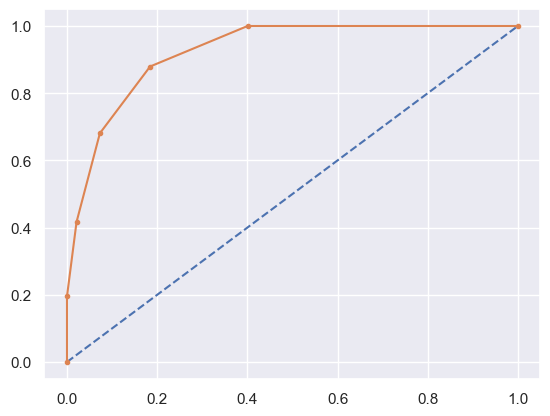

In [61]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.861


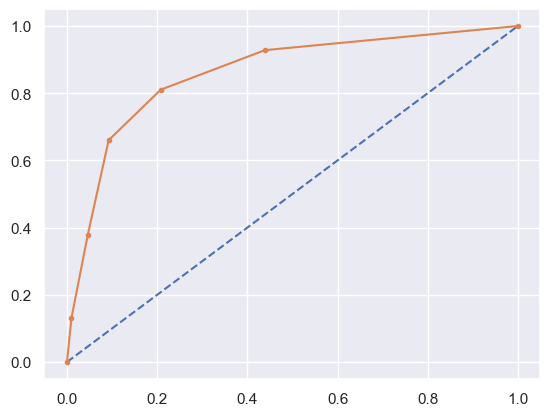

In [62]:

# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Naive bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
nb=GaussianNB()

In [65]:
nb= nb.fit(x_train, y_train)

In [66]:
print(confusion_matrix(nb.predict(x_train),y_train))
print(classification_report(nb.predict(x_train),y_train))

[[675  96]
 [ 79 211]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       771
           1       0.69      0.73      0.71       290

    accuracy                           0.84      1061
   macro avg       0.79      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [67]:
print(confusion_matrix(nb.predict(x_test),y_test))
print(classification_report(nb.predict(x_test),y_test))

[[263  41]
 [ 40 112]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       304
           1       0.73      0.74      0.73       152

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.888


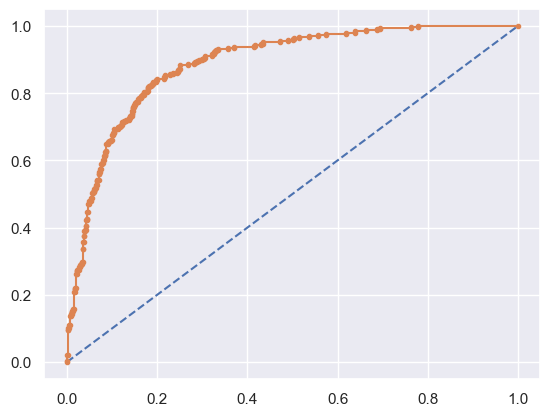

In [68]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.876


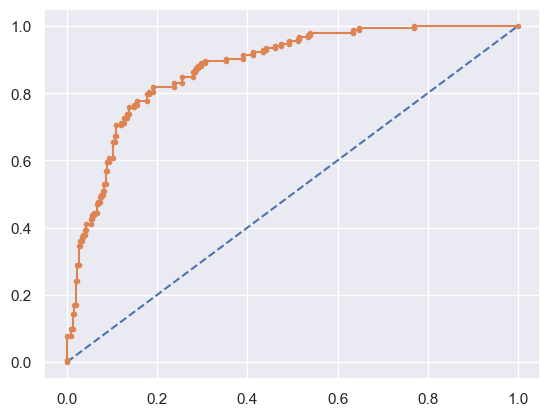

In [69]:
# predict probabilities
probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Model Tuning, Bagging (Random Forest applied for Bagging) and Boosting

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [71]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [72]:
ADB_model=AdaBoostClassifier()

In [73]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)

In [74]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [75]:
ADB_model=grid_search.best_estimator_

In [76]:
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

In [77]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8369462770970783
[[702  52]
 [121 186]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       754
           1       0.78      0.61      0.68       307

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



AUC: 0.902


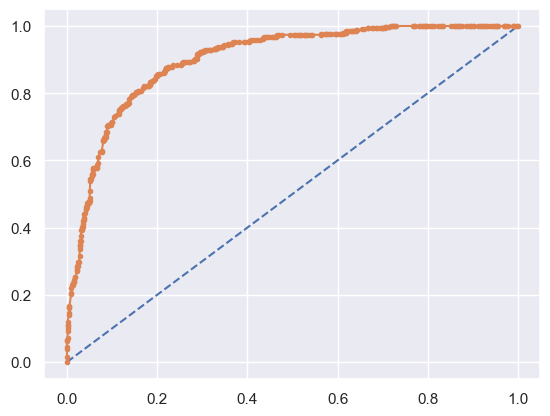

In [78]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [79]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8092105263157895
[[271  32]
 [ 55  98]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       303
           1       0.75      0.64      0.69       153

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.80       456



AUC: 0.884


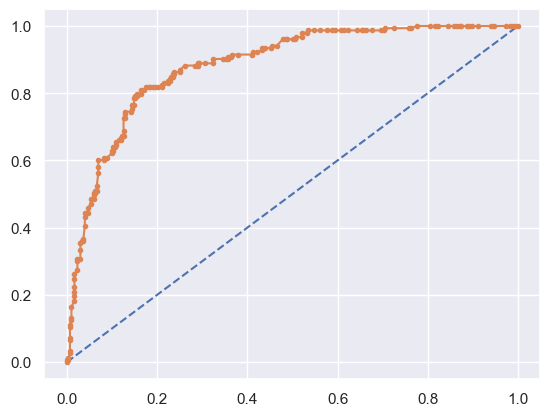

In [80]:
# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Decision tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [83]:
DT_model= DecisionTreeClassifier()

In [84]:
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)

In [85]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [86]:
DT_model=grid_search.best_estimator_

In [87]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

In [88]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8397737983034873
[[657  97]
 [ 73 234]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       754
           1       0.71      0.76      0.73       307

    accuracy                           0.84      1061
   macro avg       0.80      0.82      0.81      1061
weighted avg       0.84      0.84      0.84      1061



AUC: 0.907


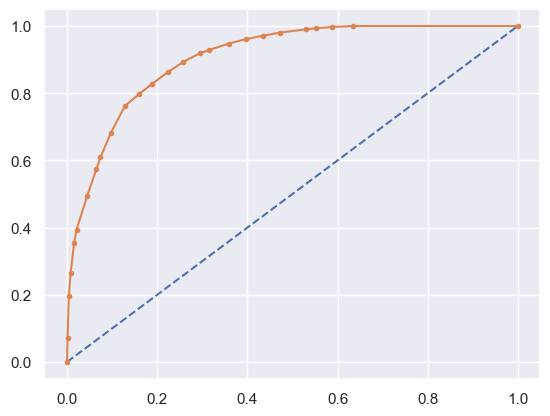

In [89]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [90]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.7960526315789473
[[250  53]
 [ 40 113]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       303
           1       0.68      0.74      0.71       153

    accuracy                           0.80       456
   macro avg       0.77      0.78      0.78       456
weighted avg       0.80      0.80      0.80       456



AUC: 0.856


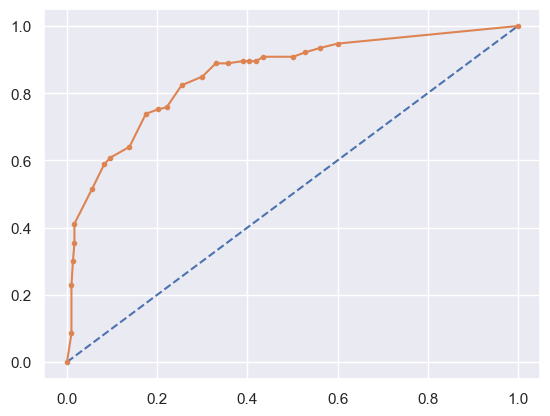

In [91]:
# predict probabilities
probs = DT_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [94]:

RF_model=RandomForestClassifier()

In [95]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [96]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [97]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=0)

In [98]:
RF_model=grid_search.best_estimator_

In [99]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=30,
                       random_state=0)

In [100]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(x_train)
model_score =RF_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8576814326107446
[[708  46]
 [105 202]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       754
           1       0.81      0.66      0.73       307

    accuracy                           0.86      1061
   macro avg       0.84      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



AUC: 0.918


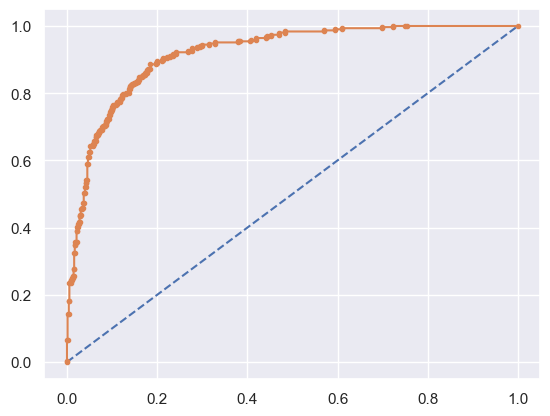

In [101]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [102]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(x_test)
model_score = RF_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8179824561403509
[[280  23]
 [ 60  93]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       303
           1       0.80      0.61      0.69       153

    accuracy                           0.82       456
   macro avg       0.81      0.77      0.78       456
weighted avg       0.82      0.82      0.81       456



AUC: 0.891


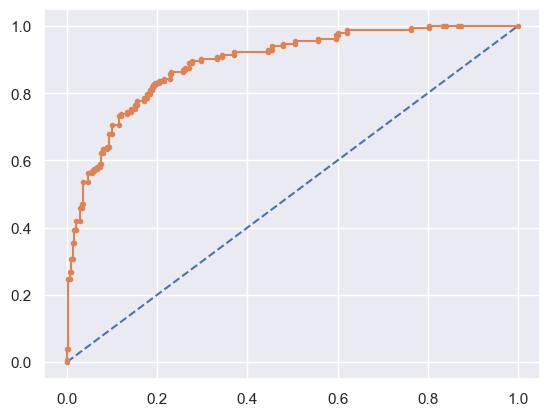

In [103]:
# predict probabilities
probs = RF_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## insights

1)Comparing all the performance measure, Naïve Bayes model from second iteration is performing best. Although there are some other models such as SVM and Extreme Boosting which is performing almost same as that of Naïve Bayes. But Naïve Bayes model is very consistent when train and test results are compared with each other. Along with other parameters such as Recall value, AUC_SCORE and AUC_ROC_Curve, those results were pretty good is this model.

2)Labour party is performing better than Conservative from huge margin.

3)Female voters turn out is greater than the male voters.

4)Those who have better national economic conditions are preferring to vote for Labour party.
5)Persons having higher Eurosceptic sentiments conservative party are preferring to vote for Conservative party.
6)Those who have higher political knowledge have voted for Conservative party
7)Looking at the assessment for both the leaders, Labour Leader is performing well as he has got better ratings in assessment.

# Problem 2

## Find the number of Character, words & sentences in all three speeches

In [104]:
import nltk

nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\auror\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


## Number of characters in each file 

In [105]:
# get the Length of the data
number_of_characters = len(Roosevelt)

print('Number of characters in Roosevelt file :', number_of_characters)

number_of_characters = len(Kennedy)

print('Number of characters in Kennedy file :', number_of_characters)

number_of_characters = len(Nixon)

print('Number of characters in Nixon file :', number_of_characters)

Number of characters in Roosevelt file : 7571
Number of characters in Kennedy file : 7618
Number of characters in Nixon file : 9991


## Number of words in each text file

In [106]:
# number of words in Kennedy
x = inaugural.raw('1961-Kennedy.txt')
words = x.split()
print('Number of words in Kennedy file :', len(words))

# number of words in Nixon
x = inaugural.raw('1973-Nixon.txt')
words = x.split()
print('Number of words in Nixon file :', len(words))

# number of words in Roosevelt
x = inaugural.raw('1941-Roosevelt.txt')
words = x.split()
print('Number of words in Roosevelt file :', len(words))

Number of words in Kennedy file : 1390
Number of words in Nixon file : 1819
Number of words in Roosevelt file : 1360


## Number of sentences

In [107]:
# number of sentences in Nixon
y = pd.DataFrame({'Text':inaugural.raw('1973-Nixon.txt')}, index = [0])
y['sentences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

Text  sentences
0  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...         68

In [108]:
# number of sentences in Kennedy
y = pd.DataFrame({'Text':inaugural.raw('1961-Kennedy.txt')}, index = [0])
y['sentences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

Text  sentences
0  Vice President Johnson, Mr. Speaker, Mr. Chief...         52

In [109]:
# number of sentences in Roosevelt
y = pd.DataFrame({'Text':inaugural.raw('1941-Roosevelt.txt')}, index = [0])
y['sentences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

Text  sentences
0  On each national day of inauguration since 178...         67

## Stopword removal & Stemming 

In [110]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\auror\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\auror\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [111]:
# Remove all the stopwords from the Roosevelt speeches.


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

word_tokens = word_tokenize(Roosevelt)

filtered_sentence = [w for w in word_tokens if not w in stop_words]
stemmed_sentence = [stemmer.stem(w) for w in filtered_sentence]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)
print("Roosevelt Stemmed Sentence:")
print(stemmed_sentence)

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', '.',

In [112]:
# Remove all the stopwords from the Kennedy speeches.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(Kennedy)

filtered_sentence = [w for w in word_tokens if not w in stop_words]
stemmed_sentence = [stemmer.stem(w) for w in filtered_sentence]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)
print("Kennedy Stemmed Sentence:")
print(stemmed_sentence)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the', 'same', 'revolutionary', 

In [113]:
# Remove all the stopwords from the Nixon speeches.

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(Nixon)

filtered_sentence = [w for w in word_tokens if not w in stop_words]
stemmed_sentence = [stemmer.stem(w) for w in filtered_sentence]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)
print("Nixon Stemmed Sentence:")
print(stemmed_sentence)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that'

## 3 most common words used in all three speeches

In [114]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

tokenizer = RegexpTokenizer(r'\w+')
roosevelt_no_punc = tokenizer.tokenize(Roosevelt)
set(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('Nation', 12),
 ('Spirit', 9),
 ('Life', 9),
 ('Democracy', 9),
 ('America', 7),
 ('Years', 6),
 ('Freedom', 6),
 ('Human', 5),
 ('Body', 5),
 ('Mind', 5),
 ('Speaks', 5),
 ('Day', 4),
 ('States', 4),
 ('Government', 4),
 ('Faith', 4),
 ('United', 3),
 ('Task', 3),
 ('History', 3),
 ('Nations', 3),
 ('Live', 3),
 ('Future', 3),
 ('Free', 3),
 ('Continent', 3),
 ('Person', 3),
 ('World', 3),
 ('Sacred', 3),
 ('Destiny', 3),
 ('National', 2),
 ('1789', 2),
 ('Washington', 2),
 ('Create', 2),
 ('Disruption', 2),
 ('Time', 2),
 ('Midst', 2),
 ('Stock', 2),
 ('Lives', 2),
 ('Measure', 2),
 ('Doubt', 2),
 ('Measured', 2),
 ('Americans', 2),
 ('Republic', 2),
 ('Acted', 2),
 ('Security', 2),
 ('Things', 2),
 ('Present', 2),
 ('Built', 2),
 ('Maintained', 2),
 ('Constitution', 2),
 ('Freely', 2),
 ('American', 2),
 ('Enterprise', 2),
 ('Forms', 2),
 ('Hopes', 2),
 ('Find', 2),
 ('Early', 2),
 ('Peoples', 2),
 ('Written', 2),
 ('Land', 2),
 ('Forward', 2),
 ('Words', 2),
 ('Preservation', 2),

In [115]:
# Total number of words Kennedy Speech
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

tokenizer = RegexpTokenizer(r'\w+')
Kennedy_no_punc = tokenizer.tokenize(Kennedy)
set(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in Kennedy_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('World', 8),
 ('Sides', 8),
 ('Pledge', 7),
 ('Citizens', 5),
 ('Power', 5),
 ('Free', 5),
 ('Nations', 5),
 ('President', 4),
 ('Fellow', 4),
 ('Freedom', 4),
 ('Americans', 4),
 ('Peace', 4),
 ('Hope', 4),
 ('Arms', 4),
 ('Country', 4),
 ('Call', 4),
 ('Today', 3),
 ('God', 3),
 ('Human', 3),
 ('Poverty', 3),
 ('Life', 3),
 ('Globe', 3),
 ('Dare', 3),
 ('Generation', 3),
 ('Bear', 3),
 ('Control', 3),
 ('Join', 3),
 ('Begin', 3),
 ('Final', 3),
 ('Vice', 2),
 ('Mr', 2),
 ('Forebears', 2),
 ('Century', 2),
 ('Hands', 2),
 ('Forms', 2),
 ('Rights', 2),
 ('Hand', 2),
 ('Revolution', 2),
 ('Word', 2),
 ('Time', 2),
 ('Friend', 2),
 ('Foe', 2),
 ('Passed', 2),
 ('Nation', 2),
 ('Committed', 2),
 ('Burden', 2),
 ('Meet', 2),
 ('Support', 2),
 ('Oppose', 2),
 ('Assure', 2),
 ('Success', 2),
 ('Loyalty', 2),
 ('United', 2),
 ('Powerful', 2),
 ('States', 2),
 ('Welcome', 2),
 ('Tyranny', 2),
 ('Find', 2),
 ('Supporting', 2),
 ('Back', 2),
 ('Seek', 2),
 ('South', 2),
 ('Offer', 2),
 ('Deeds

In [116]:
# Total number of words Nixon Speech

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter

tokenizer = RegexpTokenizer(r'\w+')
Nixon_no_punc = tokenizer.tokenize(Nixon)
set(w.title() for w in Nixon_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in Nixon_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('America', 21),
 ('Peace', 19),
 ('World', 18),
 ('Nation', 11),
 ('Responsibility', 11),
 ('Government', 10),
 ('Great', 9),
 ('Home', 9),
 ('Abroad', 8),
 ('Years', 7),
 ('Policies', 7),
 ('Role', 7),
 ('Make', 7),
 ('History', 7),
 ('Time', 6),
 ('Today', 5),
 ('Responsibilities', 5),
 ('Progress', 5),
 ('Respect', 5),
 ('Act', 5),
 ('Promise', 4),
 ('Long', 4),
 ('Work', 4),
 ('Freedom', 4),
 ('God', 4),
 ('Proud', 4),
 ('Faith', 4),
 ('Mr', 3),
 ('Country', 3),
 ('Share', 3),
 ('Resolve', 3),
 ('Retreat', 3),
 ('Greatly', 3),
 ('Century', 3),
 ('Nations', 3),
 ('Bold', 3),
 ('Future', 3),
 ('Forward', 3),
 ('Build', 3),
 ('Structure', 3),
 ('Live', 3),
 ('System', 3),
 ('Gladly', 3),
 ('Challenges', 3),
 ('Away', 3),
 ('Individual', 3),
 ('Ashamed', 3),
 ('Spirit', 2),
 ('Conflict', 2),
 ('Meet', 2),
 ('Stand', 2),
 ('Enter', 2),
 ('Leads', 2),
 ('Danger', 2),
 ('Renew', 2),
 ('Past', 2),
 ('Year', 2),
 ('Initiatives', 2),
 ('Wars', 2),
 ('Generations', 2),
 ('Important', 2),
 (

## Plot Word cloud of all three speeches

In [117]:
!pip install wordcloud

In [118]:
# wordCloud for Document : inaugural.raw('1941-Roosevelt.txt')

import re
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from nltk.tokenize import word_tokenize

import numpy as np
from PIL import Image
import nltk

nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

# Create stopword List:
text = inaugural.raw('1941-Roosevelt.txt')
# Clean text
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\auror\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [119]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")

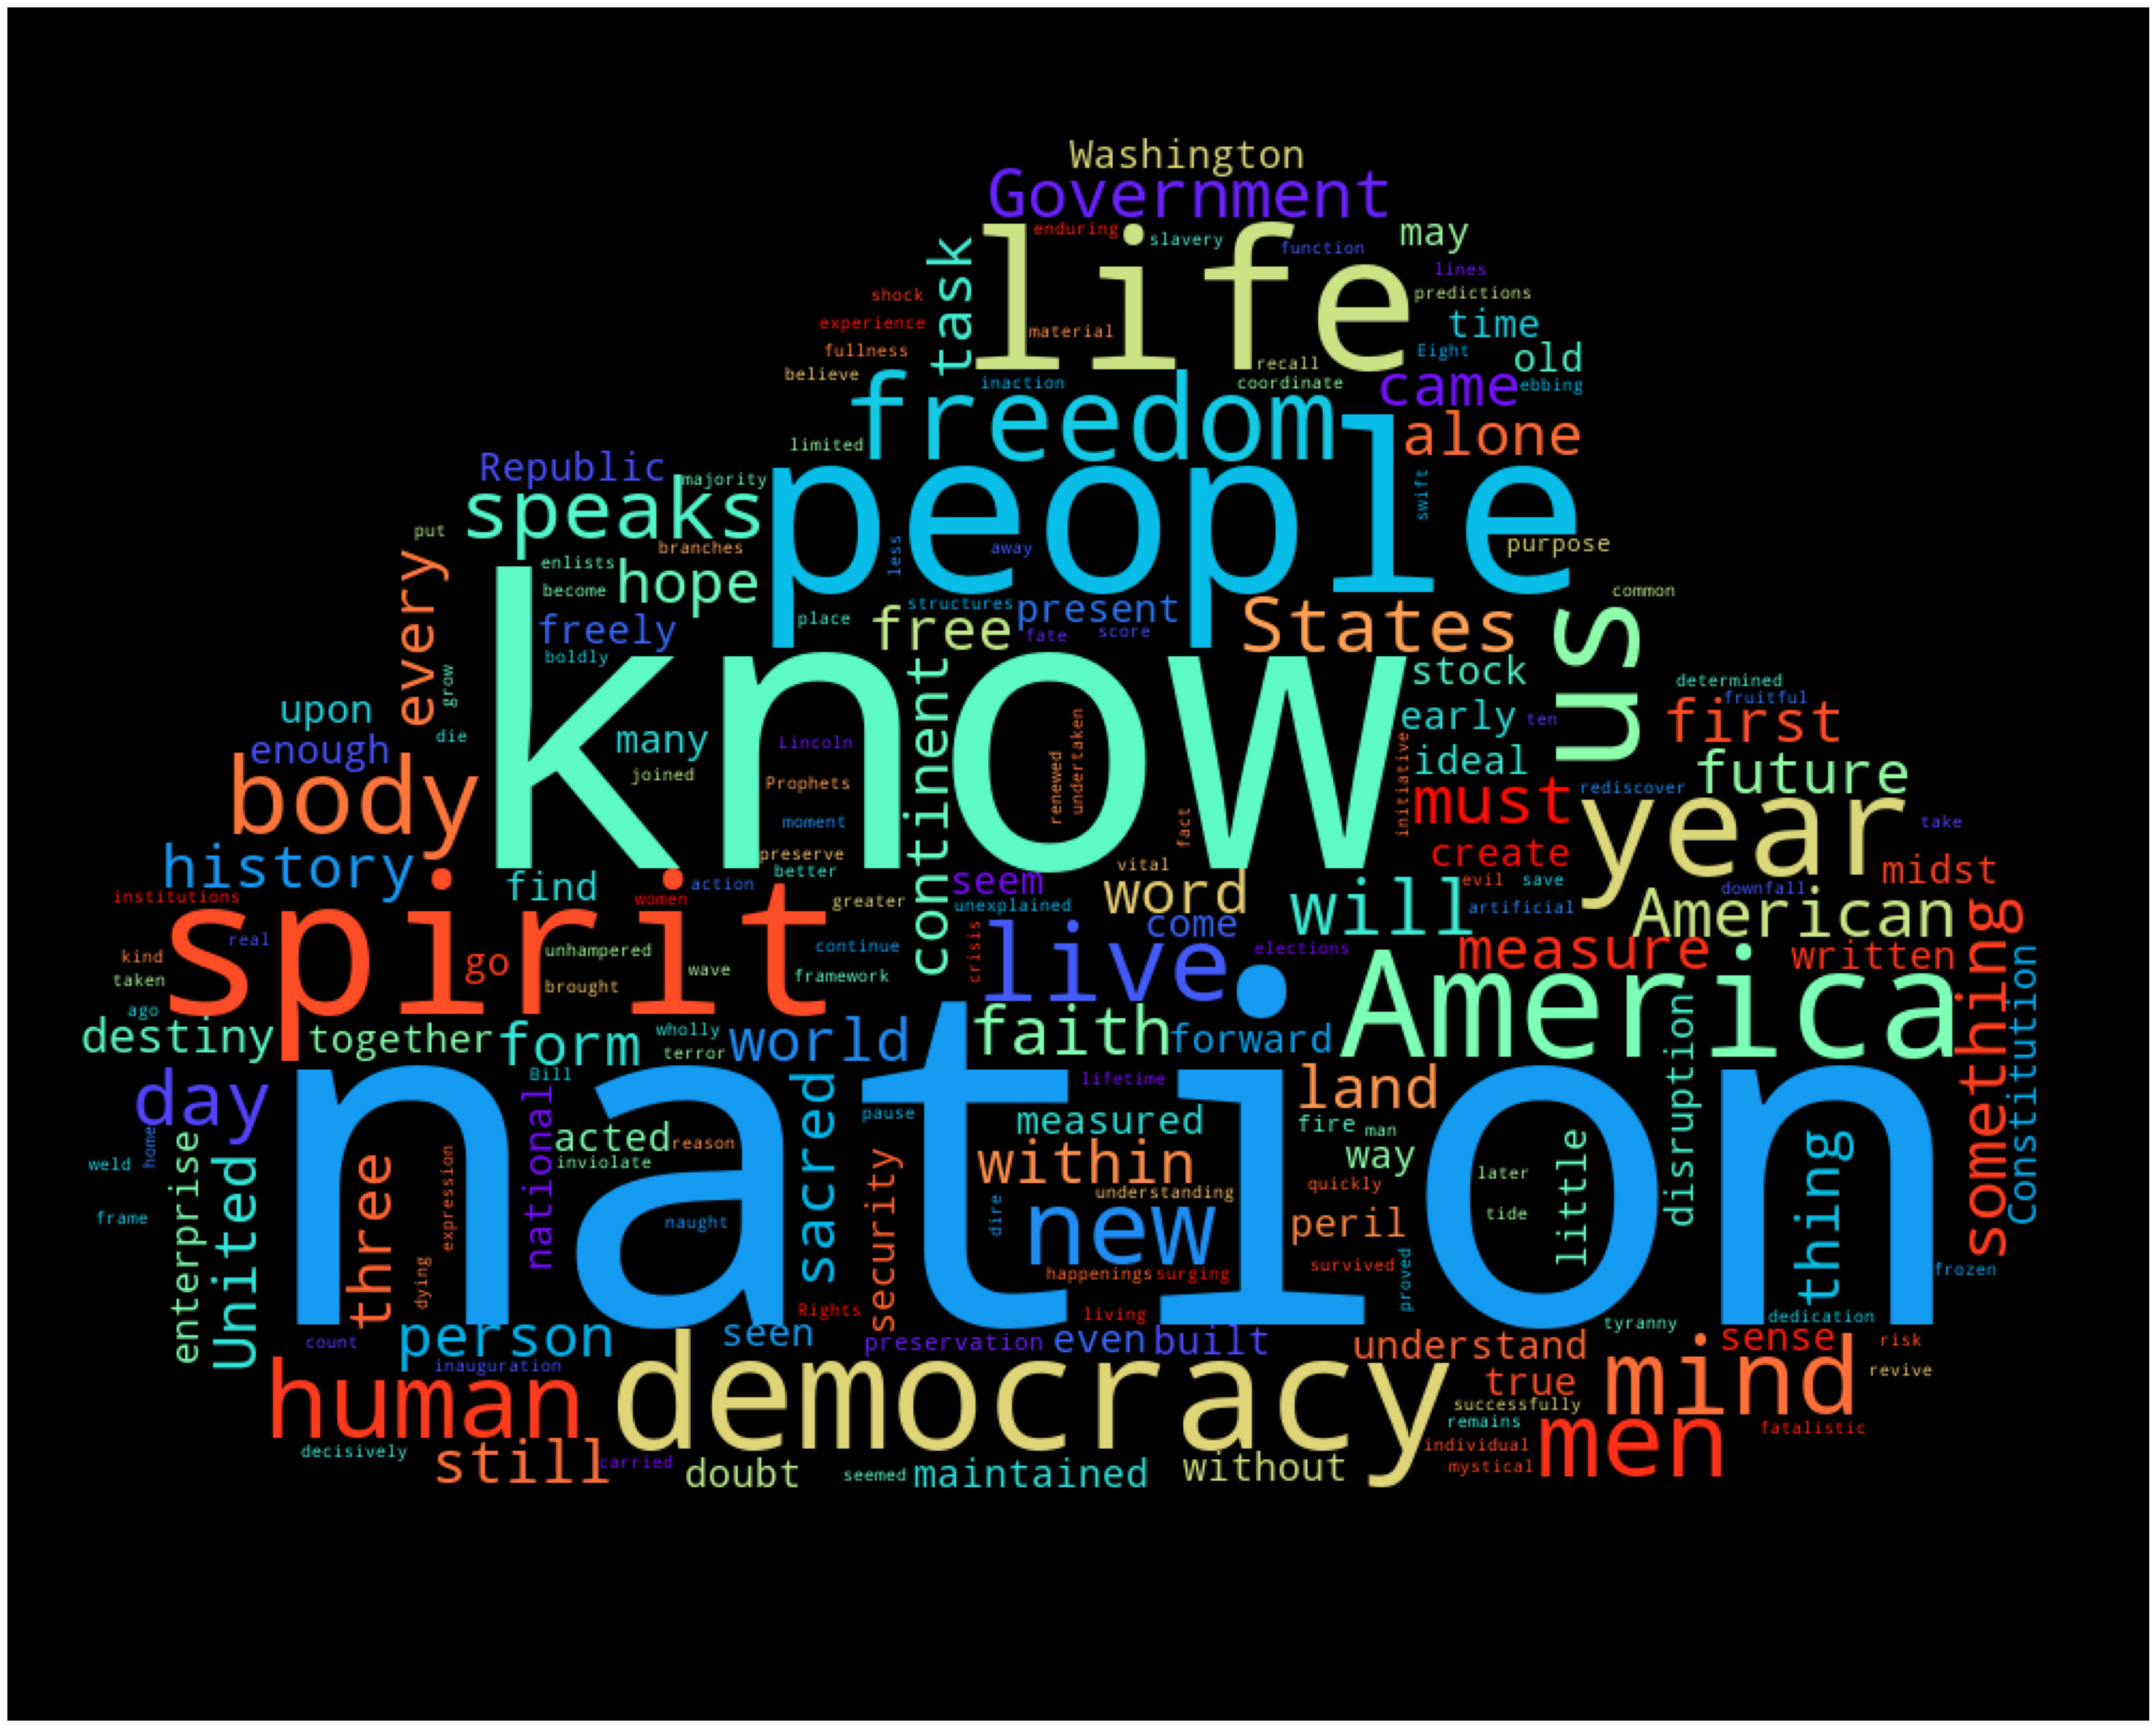

In [120]:
# Import package
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

# Import image to np.array
mask = np.array(Image.open('cloud.png'))



# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='rainbow', collocations=False,mask=mask).generate(text)

# Plot
plot_cloud(wordcloud)

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\auror\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


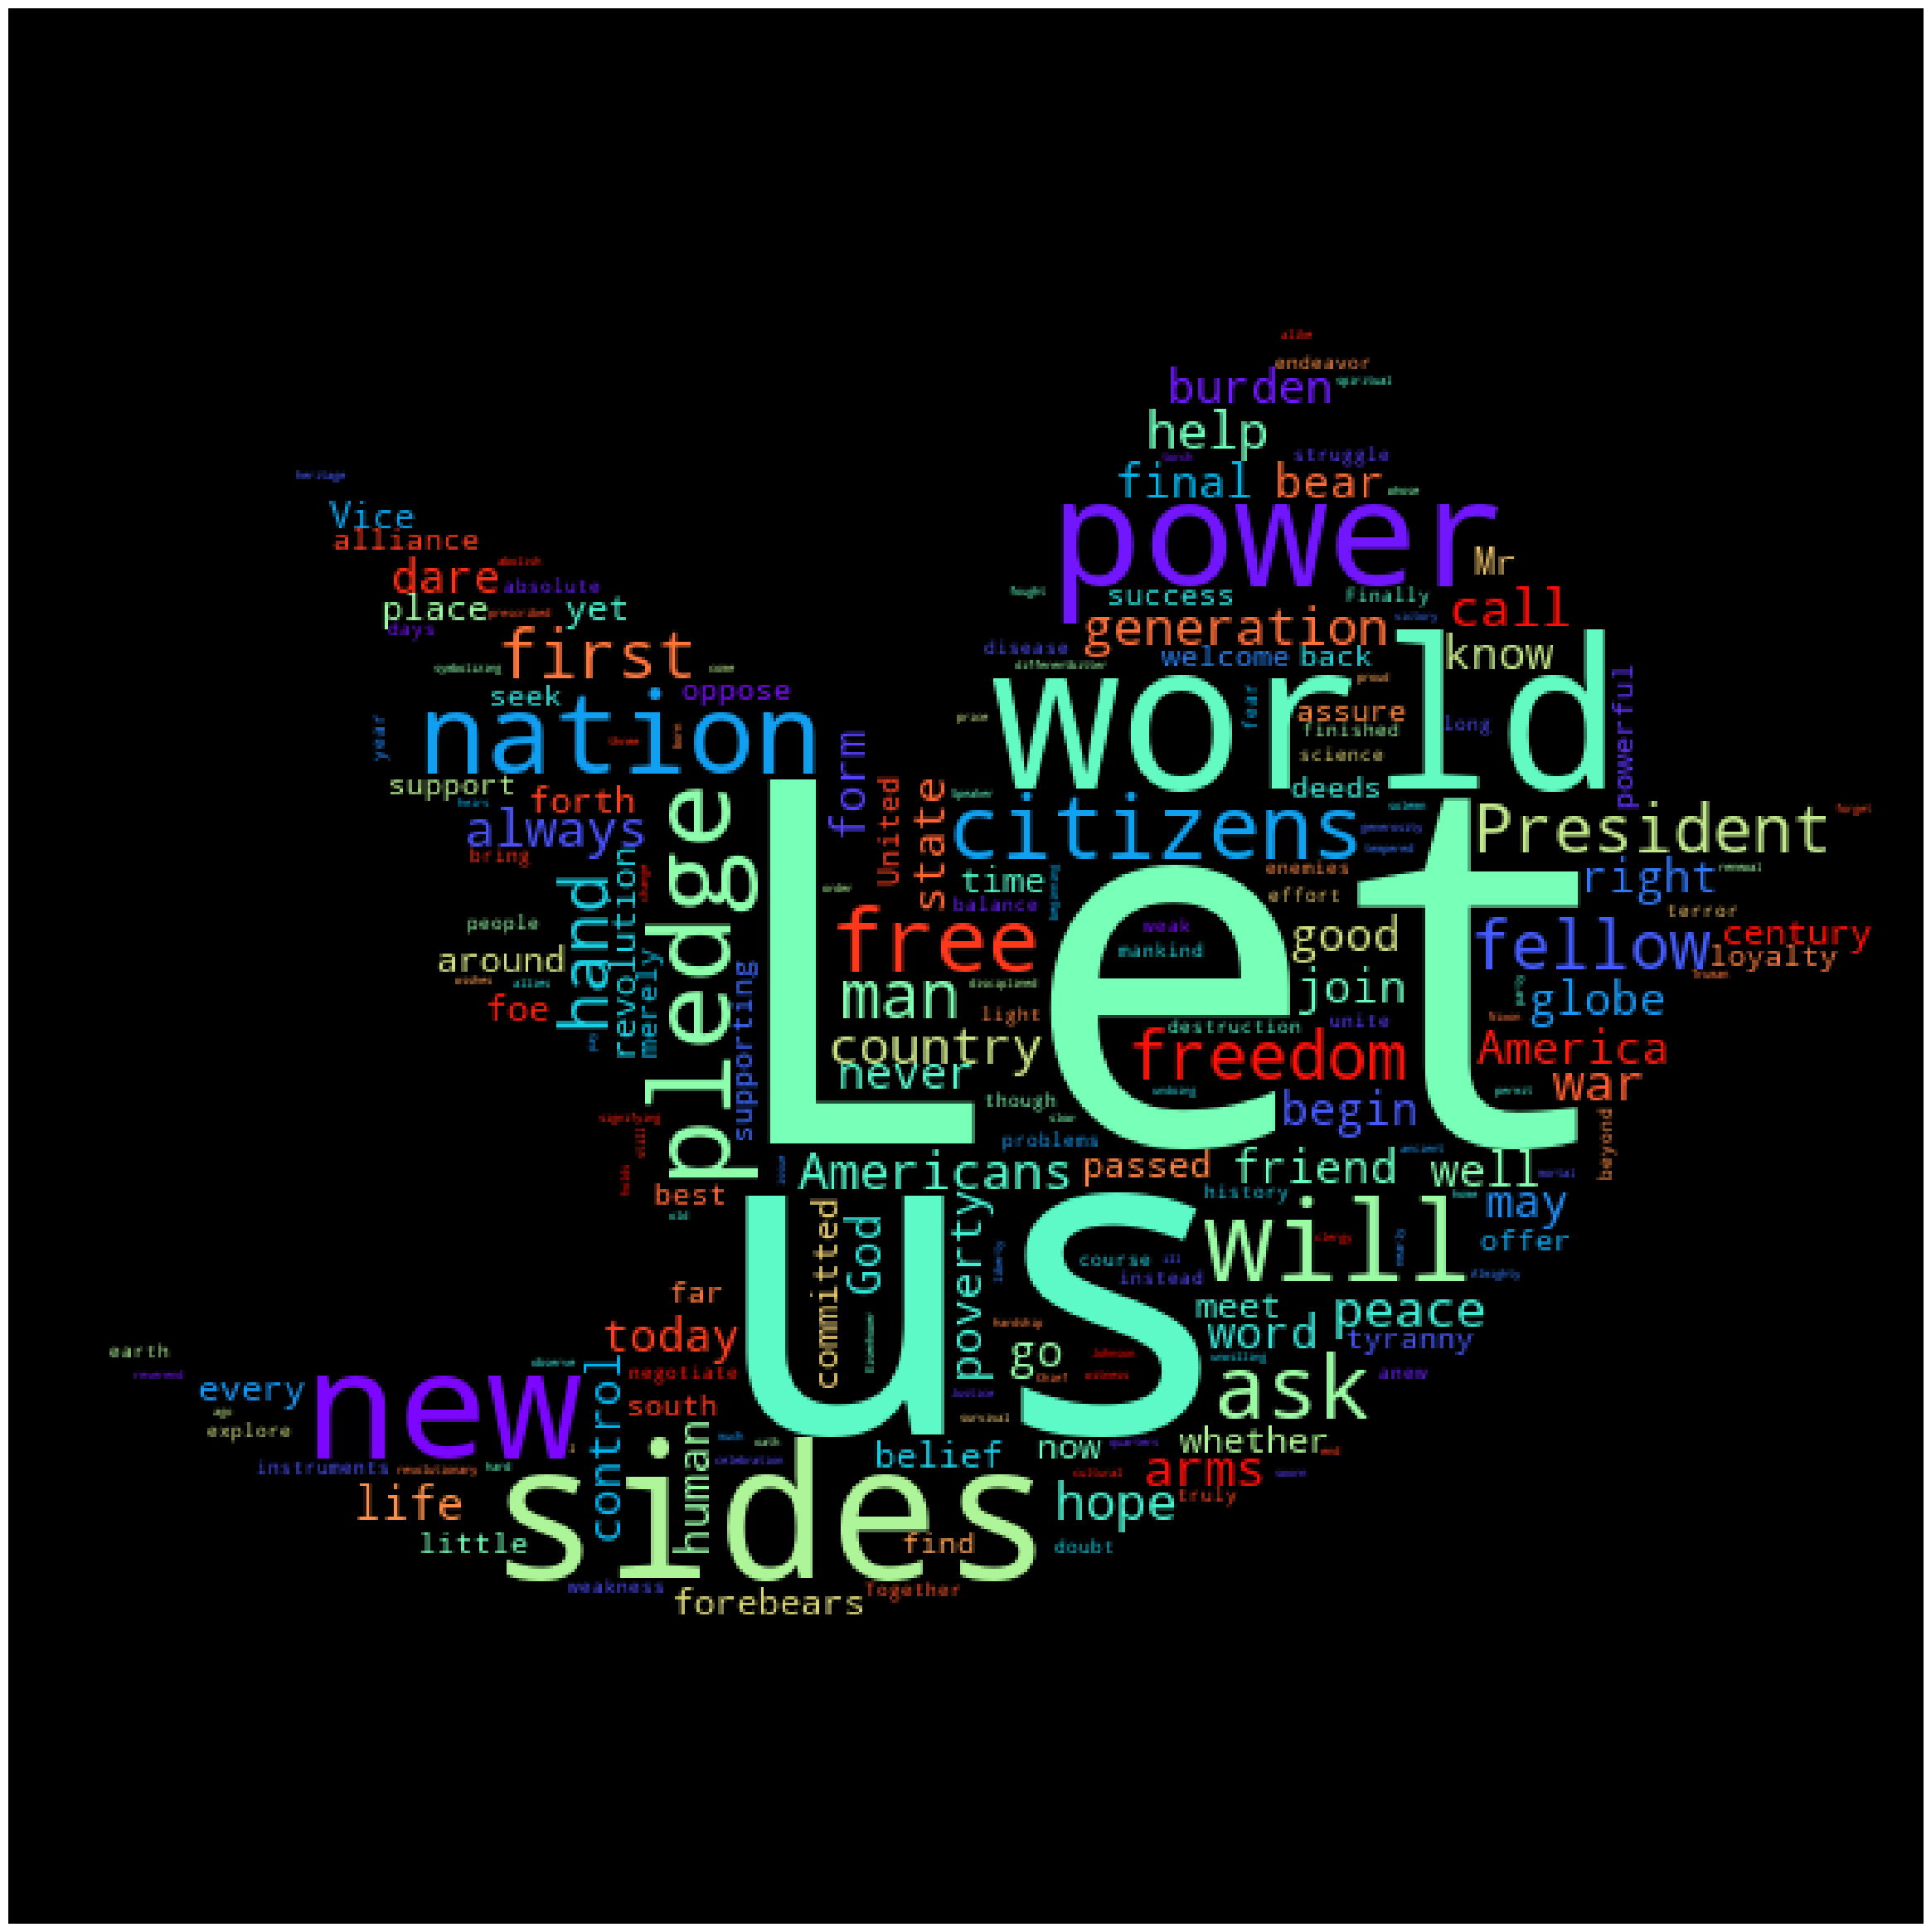

In [121]:
import re
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from nltk.tokenize import word_tokenize

import numpy as np
from PIL import Image
import nltk

nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

# Create stopword list:
text = inaugural.raw('1961-Kennedy.txt')
# Clean text
text = re.sub(r'==.+==', ' ', text)
text = text.replace('\n', ' ')
#print(text)

# Import packages
import matplotlib.pyplot as plt
%matplotlib inline

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

import numpy as np
from PIL import Image
# Import image to np.array
mask = np.array(Image.open('M2jeo.jpg'))

from wordcloud import WordCloud, STOPWORDS

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='rainbow', collocations=False,mask=mask).generate(text)

# Plot
plot_cloud(wordcloud)

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\auror\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


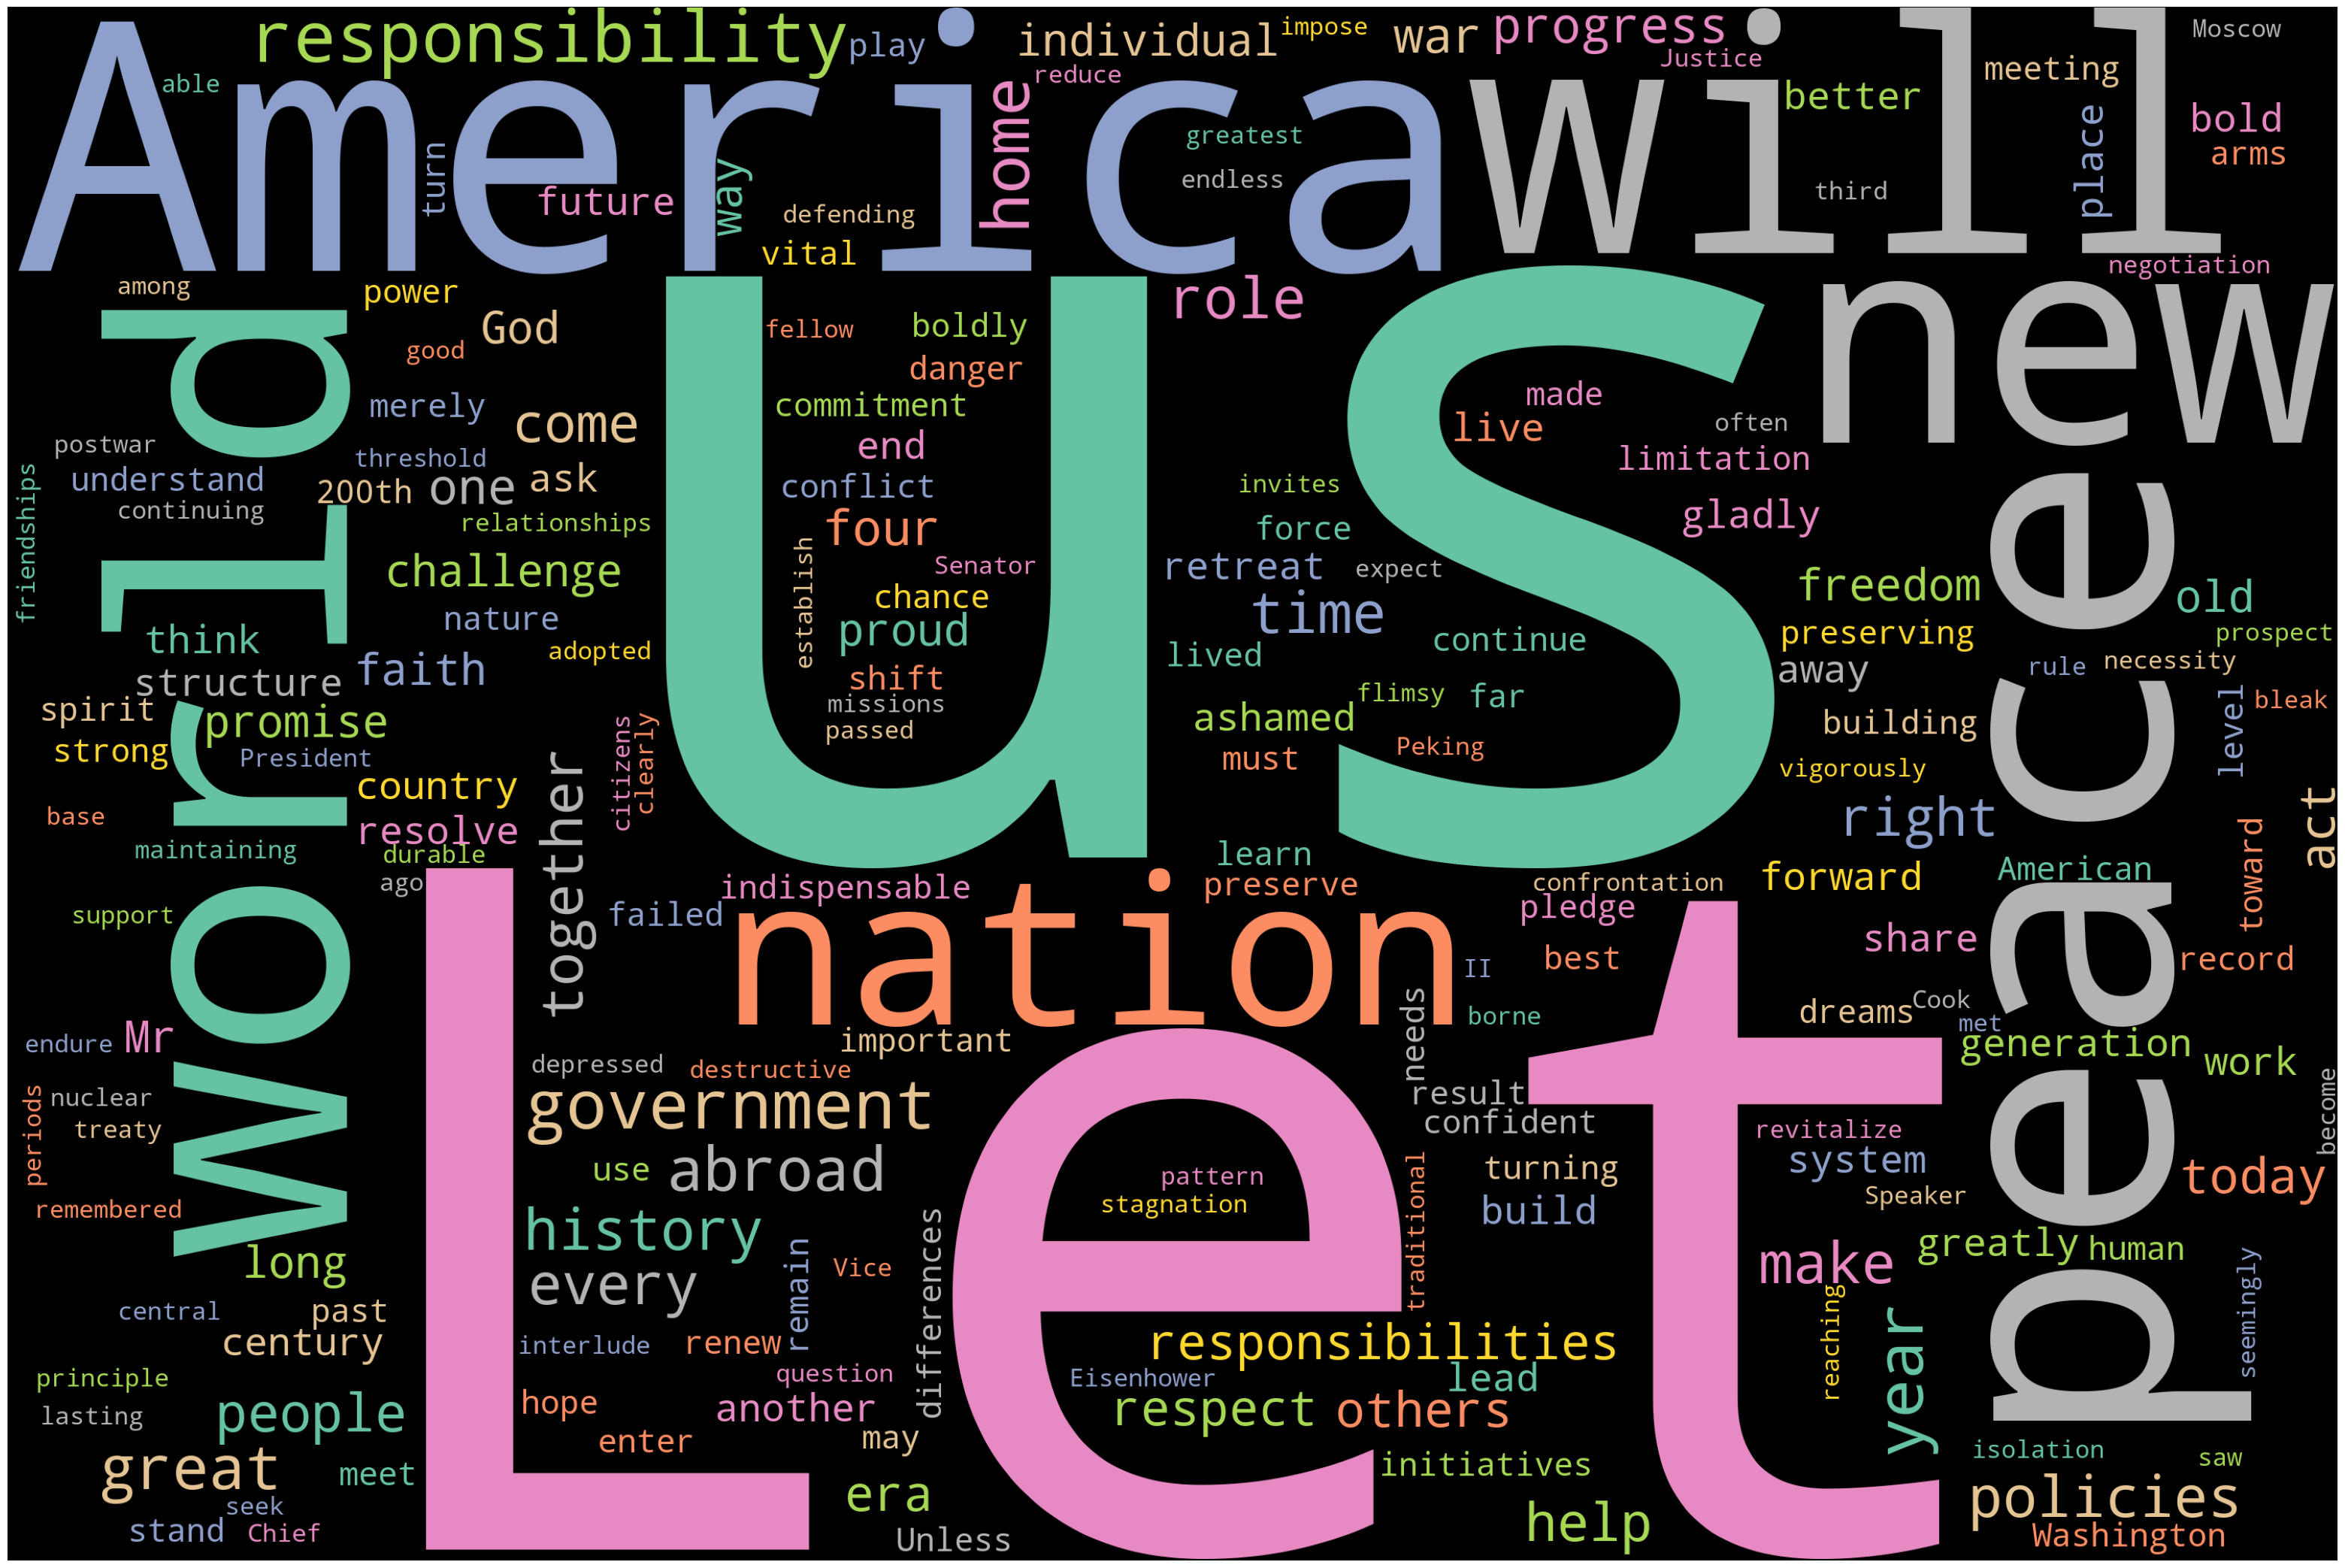

In [122]:
import re
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from nltk.tokenize import word_tokenize

import numpy as np
from PIL import Image
import nltk

nltk.download('inaugural')

from nltk.corpus import inaugural

inaugural.fileids()

# Create stopword list:
text = inaugural.raw('1973-Nixon.txt')
# Clean text
text = re.sub(r'--.*?--', ' ', text)
text = text.replace('\n', ' ')
#print(text)
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");
# Import package
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)